In [265]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

# Requirements

The 4 Coronavirus Datasets
- https://www.kaggle.com/sudalairajkumar/datasets
- https://www.kaggle.com/kimjihoo/datasets

In [344]:
general_path = '/Users/morgan/Code/Data/novel-corona-virus-2019-dataset'
korea_path = '/Users/morgan/Code/Data/coronavirusdataset'
USA_path = '/Users/morgan/Code/Data/covid19-in-usa'
Italy_path = '/Users/morgan/Code/Data/covid19-in-italy'

In [183]:
korea_timeline = os.path.join(korea_path,'Time.csv')
general_timeline = os.path.join(general_path,'time_series_covid_19_confirmed.csv')

In [186]:
korea_df = pd.read_csv(korea_timeline)

In [187]:
general_df = pd.read_csv(general_timeline)

# Utils

In [142]:
def plot_totals(cases,deaths=None):
    epochs = range(1,len(cases)+1)
    plt.plot(epochs,cases,'g',label="Confirmed Cases")
    if deaths:
        plt.plot(epochs,deaths,'m',label="Deaths")
    plt.title('Covid19')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()

#     plt.clf()
#     acc = history.history['acc']
#     val_acc = history.history['val_acc']

#     plt.plot(epochs,acc,'bo',label='Training acc')
#     plt.plot(epochs,val_acc,'b',label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.show()

In [325]:
def parse_date(date_str):
    return datetime.datetime.strptime(date_str,'%m/%d/%y')

# List all the contained countries

In [133]:
general_df['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

In [134]:
France = general_df[general_df['Country/Region'] == 'France']
Spain = general_df[general_df['Country/Region'] == 'Spain']
Italy = general_df[general_df['Country/Region'] == 'Italy']
US = general_df[general_df['Country/Region'] == 'US']
China = general_df[general_df['Country/Region'] == 'China']

# USA

In [135]:
US

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
100,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,0,0,0,267,366,442,568,572
101,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,173,220,328,421,525
102,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,0,0,144,177,221,282,340
103,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,0,0,0,92,95,108,123,138
104,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,45,45,45,46,46,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,"Wayne, MI",US,42.2791,-83.3362,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,6
424,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [145]:
US_cases = US.iloc[:,4:]

In [338]:
US_totals = US_cases.sum(axis=0).values

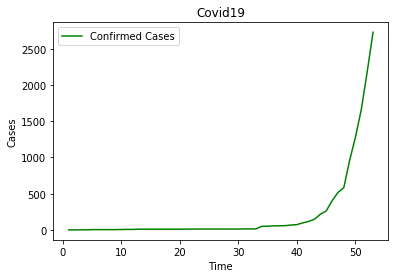

In [340]:
plot_totals(US_totals)

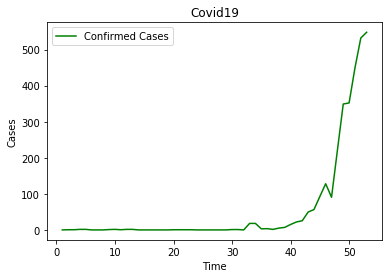

In [341]:
plot_totals(np.gradient(US_totals))

In [342]:
peak_US_index = np.argmax(np.gradient(US_totals))
print(f'Peak index {peak_US_index}')
print(f'Confirmed cases {US_totals[peak_US_index]}')

Peak index 52
Confirmed cases 2727


In [343]:
US_first_case_index = np.min(np.nonzero(US_totals))
print(f'Date of first case {US.columns[4+first_case_index]}')
print(f'Date of peak {US.columns[peak_US_index]}')
US_start_date = parse_date(US.columns[4+first_case_index])
US_peak_date = parse_date(US.columns[peak_US_index])

print(f'Duration in days {US_peak_date - US_start_date}')

Date of first case 1/24/20
Date of peak 3/10/20
Duration in days 46 days, 0:00:00


# Italy

In [70]:
Italy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
16,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157


In [71]:
italy_cases = Italy.iloc[:,4:]

In [150]:
italy_totals = italy_cases.values[0]

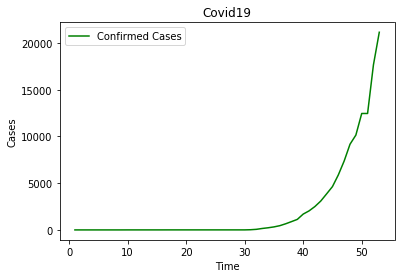

In [151]:
plot_totals(italy_totals)

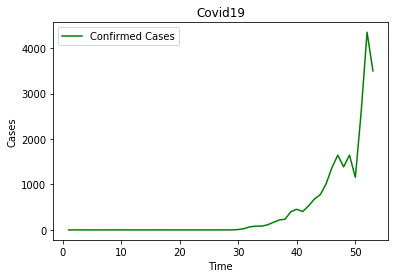

In [153]:
plot_totals(np.gradient(italy_totals))

In [250]:
peak_italy_index = np.argmax(np.gradient(italy_totals))
print(f'Peak index {peak_italy_index}')
print(f'Confirmed cases {italy_totals[peak_italy_index]}')

Peak index 51
Confirmed cases 17660


In [311]:
italy_first_case_index = np.min(np.nonzero(italy_totals))
print(f'Date of first case {Italy.columns[4+first_case_index]}')
print(f'Date of peak {Italy.columns[4+peak_france_index]}')
italy_start_date = datetime.date(2020,2,1)
italy_peak_date = datetime.date(2020,3,13)

print(f'Duration in days {italy_peak_date - italy_start_date}')

Date of first case 1/24/20
Date of peak 3/13/20
Duration in days 41 days, 0:00:00


# France

In [74]:
France

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
159,France,France,46.2276,2.2137,0,0,2,3,3,3,...,377,653,949,1126,1209,1784,2281,2281,3661,4469
200,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2
207,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,3,3,3,3,1,1,1,1,1,1
408,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
421,Fench Guiana,France,4.0000,-53.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [154]:
french_cases = France.iloc[:,4:]

In [155]:
french_total = french_cases.sum(axis=0).values

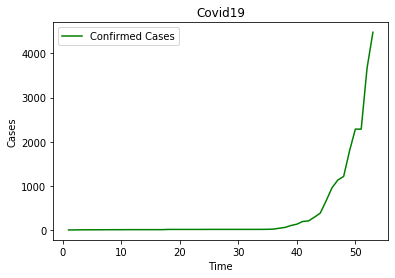

In [156]:
plot_totals(french_total)

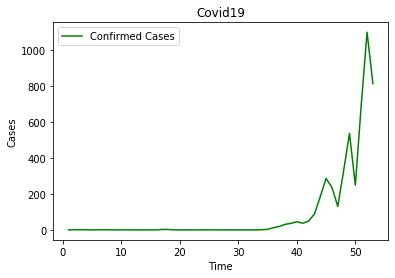

In [158]:
plot_totals(np.gradient(french_total))

In [249]:
peak_france_index = np.argmax(np.gradient(french_total))
print(f'Peak index {peak_france_index}')
print(f'Confirmed cases {french_total[peak_france_index]}')

Peak index 51
Confirmed cases 3667


In [307]:
first_case_index = np.min(np.nonzero(french_total))
print(f'Date of first case {France.columns[4+first_case_index]}')
print(f'Date of peak {France.columns[4+peak_france_index]}')
france_start_date = datetime.date(2020,2,1)
france_peak_date = datetime.date(2020,3,13)

print(f'Duration in days {france_peak_date - france_start_date}')

Date of first case 1/24/20
Date of peak 3/13/20
Duration in days 41 days, 0:00:00


# Spain

In [82]:
Spain

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
18,NaN,Spain,40.0,-4.0,0,0,0,0,0,0,...,259,400,500,673,1073,1695,2277,2277,5232,6391


In [160]:
spain_cases = Spain.iloc[:,4:]

In [161]:
spain_totals = spain_cases.values[0]

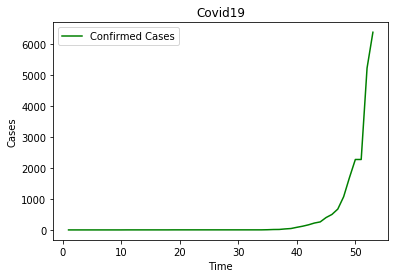

In [162]:
plot_totals(spain_totals)

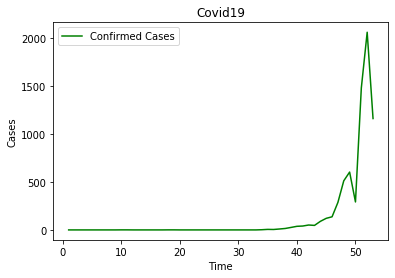

In [163]:
plot_totals(np.gradient(spain_totals))

#### Peak spain

In [247]:
peak_spain_index = np.argmax(np.gradient(spain_totals))
print(f'Peak index {peak_spain_index}')
print(f'Confirmed cases {spain_totals[peak_spain_index]}')

Peak index 51
Confirmed cases 5232


In [306]:
first_case_index = np.min(np.nonzero(spain_totals))
print(f'Date of first case {Spain.columns[4+first_case_index]}')
print(f'Date of peak {Spain.columns[4+peak_spain_index]}')
spain_start_date = datetime.date(2020,2,1)
spain_peak_date = datetime.date(2020,3,13)

print(f'Duration in days {spain_peak_date - spain_start_date}')

Date of first case 2/1/20
Date of peak 3/13/20
Duration in days 41 days, 0:00:00


# China

In [87]:
China

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
156,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790
160,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1351,1352,1352,1352,1352,1353,1356,1356,1356,1356
161,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1272,1272,1272,1272,1272,1272,1273,1273,1273,1273
162,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1215,1215,1215,1215,1215,1215,1215,1215,1215,1227
163,Hunan,China,27.6104,111.7088,4,9,24,43,69,100,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
164,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
165,Jiangxi,China,27.6140,115.7221,2,7,18,18,36,72,...,935,935,935,935,935,935,935,935,935,935
166,Shandong,China,36.3427,118.1498,2,6,15,27,46,75,...,758,758,758,758,758,758,760,760,760,760
168,Jiangsu,China,32.9711,119.4550,1,5,9,18,33,47,...,631,631,631,631,631,631,631,631,631,631
169,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576


In [88]:
china_cases = China.iloc[:,4:]

In [171]:
china_cases.shape

(33, 53)

In [176]:
china_totals = china_cases.sum(axis=0).values

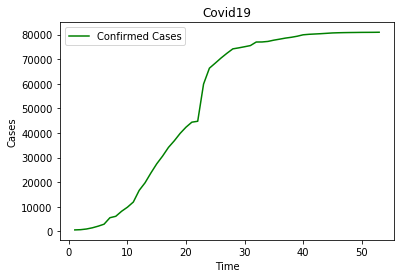

In [178]:
plot_totals(china_totals)

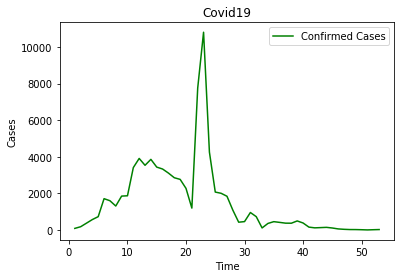

In [179]:
plot_totals(np.gradient(china_totals))

## Hubei specifically

population 58.5M

In [115]:
Hubei = China.loc[China['Province/State'].str.contains('Hubei')]

In [118]:
Hubei

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
156,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790


In [124]:
Hubei_totals = Hubei.values[0][4:]

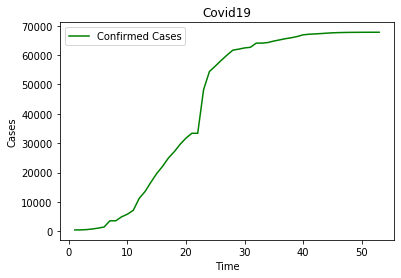

In [180]:
plot_totals(Hubei_totals)

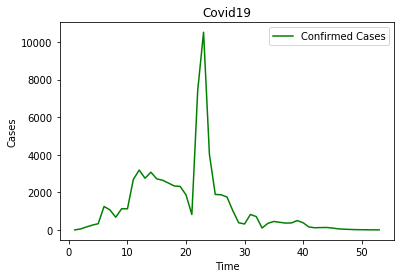

In [181]:
plot_totals(np.gradient(Hubei_totals))

# Hubei peak

In [269]:
Hubei

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
156,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790


In [268]:
Hubei_pop = 58.5*1e+7
peak_index = np.argmax(np.gradient(Hubei_totals))
Hubei_ratio = Hubei_totals/Hubei_pop
print(f'Peak index {peak_index}')
print(f'confirmed: {Hubei_totals[peak_index]}')
print(f'Total Hubei pop 58.5M')
print(f'confirmed: {Hubei_ratio[peak_index]}')
print(f'Peak Date {Hubei.columns[peak_index+4]}')
print(f'Initial start Nov 17')
hubei_peak_date = datetime.date(2020,2,13,)
hubei_start_date = datetime.date(2019,11,17)
print(f'Number of days {(hubei_peak_date-hubei_start_date).days}')



Peak index 22
confirmed: 48206
Total Hubei pop 58.5M
confirmed: 8.24034188034188e-05
Peak Date 2/13/20
Initial start Nov 17
Number of days 88


# Korea

## Pop 51.47M

## Seoul 9.77M

In [207]:
def plot_comprehensive(data,labels,colors):
    epochs = range(1,len(data[0])+1)
    for i,label in enumerate(labels):
        plt.plot(epochs,data[i],colors[i],label=label)
    plt.title('Covid19')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()

In [241]:
Seoul_pop = 9.77*1e+7

In [298]:
korea_df.tail()

,date,time,test,negative,confirmed,released,deceased
52,2020-03-12,0,234998,209402,7869,333,66
53,2020-03-13,0,248647,222728,7979,510,67
54,2020-03-14,0,261335,235615,8086,714,72
55,2020-03-15,0,268212,243778,8126,834,75
56,2020-03-16,0,274504,251297,8236,1137,75


In [220]:
tests = korea_df['test'].values
negative = korea_df['negative'].values
confirmed = korea_df['confirmed'].values
released = korea_df['released'].values
deceased = korea_df['deceased'].values
headers = korea_df.columns[2:]
korea_data = [tests,negative,confirmed,released,deceased]
colors = ['b','g','r','c','m','b']

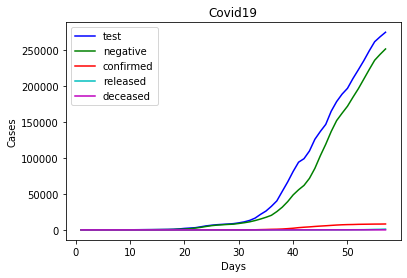

In [221]:
plot_comprehensive(korea_data,headers,colors)

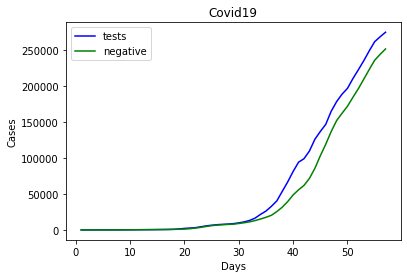

In [214]:
plot_comprehensive([tests,negative],['tests','negative'],['b','g'])

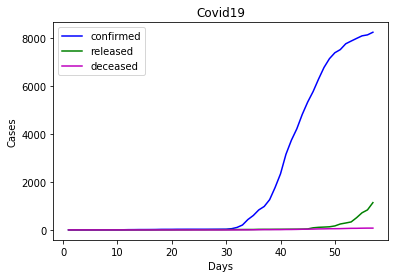

In [215]:
plot_comprehensive([confirmed,released,deceased],['confirmed','released','deceased'],['b','g','m'])

# Derivatives

In [211]:
tests_derivative = np.gradient(tests)
negative_derivative = np.gradient(negative)
confirmed_derivative = np.gradient(confirmed)
released_derivative = np.gradient(released)
deceased_derivative = np.gradient(deceased)
korea_derivatives = [tests_derivative,negative_derivative,confirmed_derivative,released_derivative,deceased_derivative]


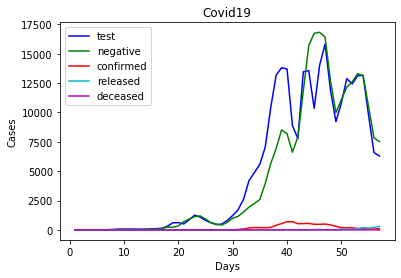

In [212]:
plot_comprehensive(korea_derivatives,headers,colors)

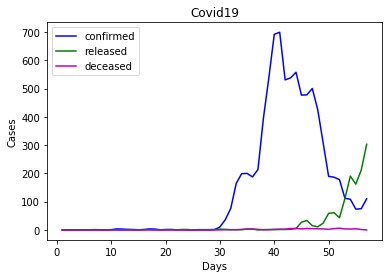

In [217]:
plot_comprehensive([confirmed_derivative,released_derivative,deceased_derivative],['confirmed','released','deceased'],['b','g','m'])


# Ratios with population

In [243]:
ratios = [d/Seoul_pop for d in korea_data]
ratio_derivatives = [np.gradient(d) for d in ratios]

# When did korea reach its peak

In [293]:
peak_index = np.argmax(confirmed_derivative)
print(f'Peak index {peak_index}')
print(f'tests: {tests[peak_index]}')
print(f'negative: {negative[peak_index]}')
print(f'confirmed: {confirmed[peak_index]}')
print(f'released: {released[peak_index]}')
print(f'deceased: {deceased[peak_index]}')
print(f'Total Seoul pop 9.77M')
print(f'tests: {ratios[0][peak_index]}')
print(f'negative: {ratios[1][peak_index]}')
print(f'confirmed: {ratios[2][peak_index]}')
print(f'released: {ratios[3][peak_index]}')
print(f'deceased: {ratios[4][peak_index]}')

Peak index 40
tests: 94055
negative: 55723
confirmed: 3150
released: 28
deceased: 17
Total Seoul pop 9.77M
tests: 0.0009626919140225179
negative: 0.0005703480040941658
confirmed: 3.224155578300921e-05
released: 2.8659160696008186e-07
deceased: 1.7400204708290685e-07


In [297]:
print(f'Korea first case {korea_df["date"][0]}')
print(f'Korea Peak date {korea_df["date"][peak_index]}')
korea_peak_date = datetime.date(2020,2,29)
korea_start_date = datetime.date(2020,1,20)
print(f'Days elapsed from start of transmission to peak {korea_peak_date - korea_start_date}')

Korea first case 2020-01-20
Korea Peak date 2020-02-29
Days elapsed from start of transmission to peak 40 days, 0:00:00
